# Theory on Basic Sampling 

This section introduces the idea of sampling from a population in statistics. Since studying an entire population is usually impractical, researchers take a sample—a smaller subset of data—and compute statistics like the mean or median. These sample statistics serve as estimates of the true, but unknown, population parameters.
Key points:
- Population vs. Sample: Population = complete dataset (often unreachable), Sample = manageable subset.
- Sample Statistics as Estimates: Means or medians from samples approximate population values.
- Sampling Variation: Different samples (e.g., 50 salmon each time) yield slightly different averages, reflecting natural variability.
- Uncertainty: This variability forms the basis for statistical inference—quantifying how confident we are in using sample data to generalize to the population.
Core takeaway: By studying sample statistics, we gain insights into the population, while also accounting for the inherent uncertainty caused by random sampling.

## Random Sampling in Python
This exercise shows how to perform random sampling programmatically in Python. Instead of drawing samples manually or via a simulation tool, the numpy.random.choice() function is used to select a subset of data from a larger array.
Key concepts:
 Population DataFrame: Represents the complete dataset of salmon weights (assumed to be fully known in this example).
- Population Mean & Distribution: Calculating the mean and plotting the full distribution gives a baseline for comparison.
- Random Sampling: np.random.choice() generates a sample of fixed size (here, 30) from the population, simulating how researchers collect manageable data subsets.
- Sample Mean: Serves as an estimate of the population mean, but differs slightly due to sampling variability.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset with salmon weights from CSV into a pandas DataFrame
population = pd.read_csv("salmon_population.csv")

# Extract the "Salmon_Weight" column as a NumPy array (easier for numerical operations)
population = np.array(population.Salmon_Weight)

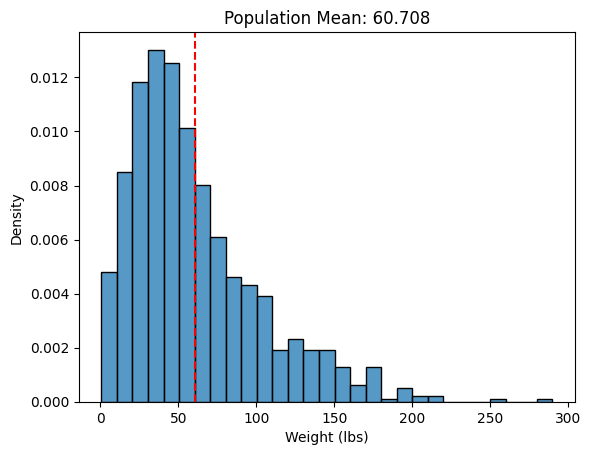

<class 'numpy.ndarray'>


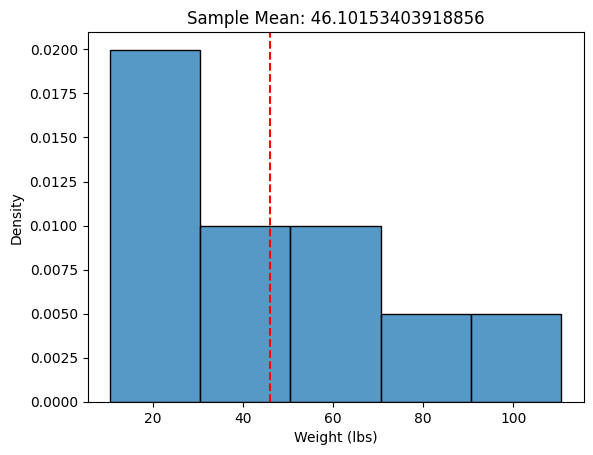

In [3]:
# Calculate the population mean (true mean, since we assume access to all weights)
# Round it to 3 decimal places for readability
pop_mean = round(np.mean(population), 3)

# Plot the histogram of the entire population distribution
# 'stat=density' scales the histogram to show probability density instead of counts
sns.histplot(population, stat='density')

# Draw a vertical red dashed line at the population mean for visual reference
plt.axvline(pop_mean, color='r', linestyle='dashed')

# Add a title showing the population mean value
plt.title(f"Population Mean: {pop_mean}")

# Label the x-axis
plt.xlabel("Weight (lbs)")

# Show the plot
plt.show()

# Clear the figure so the next plot starts fresh
plt.clf()

# Define the sample size (number of observations to randomly draw from population)
# Here we start with 10; try different values like 30 to see how variability changes
samp_size = 10

# Generate a random sample of salmon weights from the population
# replace=False means sampling *without replacement* (each fish picked only once)
sample = np.random.choice(np.array(population), samp_size, replace=False)

# Print type of the sample (should be a NumPy array)
print(type(sample))

# Calculate the mean of the drawn sample
# This estimate will differ from pop_mean due to sampling variability
sample_mean = sample.mean()

# Plot the histogram of the sample distribution
sns.histplot(sample, stat='density')

# Draw a vertical red dashed line at the sample mean for reference
plt.axvline(sample_mean, color='r', linestyle='dashed')

# Add a title showing the sample mean value
plt.title(f"Sample Mean: {sample_mean}")

# Label the x-axis
plt.xlabel("Weight (lbs)")

# Show the plot of the sample distribution
plt.show()


## Sampling Distributions
This lesson explains the idea of a sampling distribution, which describes how a statistic like the mean varies when we repeatedly draw samples from the same population. Each time a random sample is taken, its mean will differ slightly due to random variation. To quantify this, we can repeatedly collect samples of equal size, calculate their means, and then examine the distribution of those means. In the example, 500 samples of 50 fish each are taken from the population of salmon weights, and the mean of each sample is stored. Plotting these sample means produces a histogram that represents the sampling distribution of the mean. This distribution is centered around the population mean (around 60 in the example) and has a roughly symmetrical shape, reflecting how sample means fluctuate around the true mean. The same process can be applied to other statistics, such as the maximum or median, showing that sampling distributions are a general tool for understanding variability in sample-based estimates.
The distribution of the sample mean looks like this:
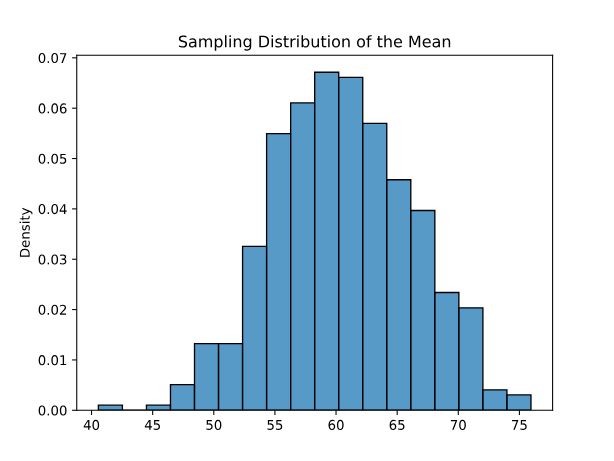

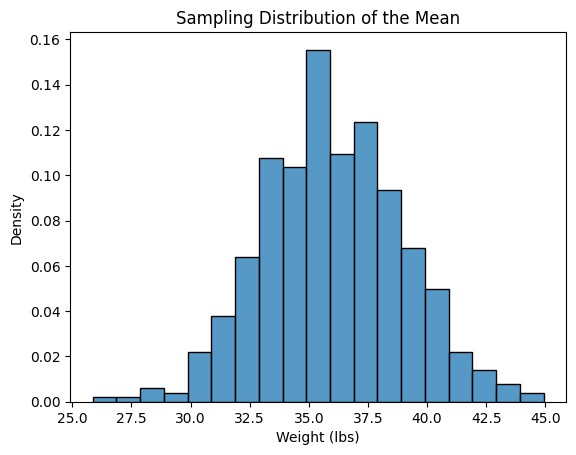

In [4]:
population = pd.read_csv("cod_population.csv")
# We pretend to have the entire cod population weights (already loaded in 'population')
# Extract just the 'Cod_Weight' column as a NumPy array for easy numerical operations
population = population['Cod_Weight']

# Define the size of each random sample (number of fish per sample)
sample_size = 50

# Create an empty list where we will store the means of each sample
sample_means = []

# Repeat the process 500 times to approximate the sampling distribution
for i in range(500):
    # Randomly select 50 cod weights without replacement from the population
    samp = np.random.choice(population, sample_size, replace=False)
    
    # Calculate the mean weight of this sample using NumPy's mean function
    this_sample_mean = samp.mean()
    
    # Save the result by appending it to our list of sample means
    sample_means.append(this_sample_mean)

# Plot the histogram of all the sample means to visualize their distribution
sns.histplot(sample_means, stat='density')

# Add a title to the plot to indicate what is being shown
plt.title("Sampling Distribution of the Mean")

# Label the x-axis as weights in pounds
plt.xlabel("Weight (lbs)")

# Show the final plot
plt.show()

## The Central Limit Theorem
The Central Limit Theorem (CLT) explains the behavior of the sampling distribution of the mean. Even if the population itself is not normally distributed, the CLT states that the distribution of sample means will tend to follow a normal distribution if the sample size is sufficiently large. A common rule of thumb is that when the sample size exceeds 30, the approximation holds well regardless of the population’s shape, while smaller samples can work if the population is already normally distributed. In the salmon weight example, the full population distribution is right-skewed, with weights ranging up to nearly 300 pounds. However, when repeatedly taking samples of size 100 and plotting their means, the resulting sampling distribution closely matches a normal curve, demonstrating the CLT in practice. This highlights how averages smooth out irregularities in the population, producing a more stable, bell-shaped distribution. Importantly, the CLT applies specifically to the mean and does not extend to other statistics such as the maximum, minimum, or variance.

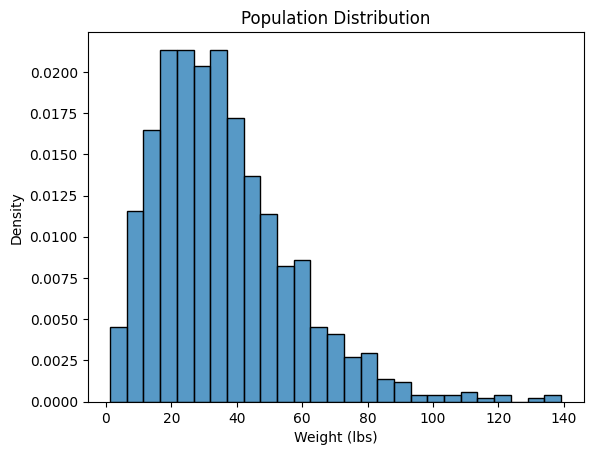

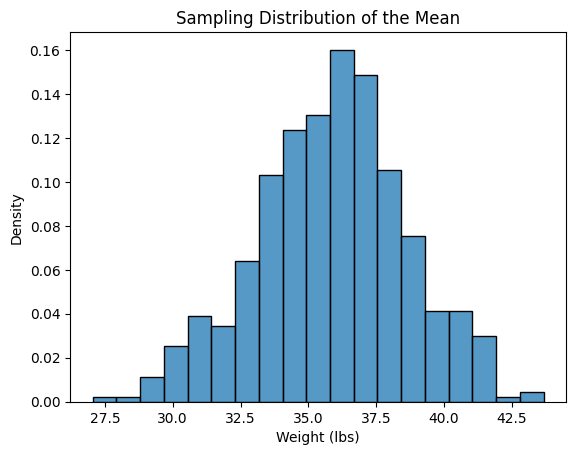

In [5]:
# ---------------------------------------------------
# Checkpoint 1: Plot the population distribution
# ---------------------------------------------------
# Here we visualize the entire cod fish population weights.
# The goal is to see whether the distribution is normal or skewed.
sns.histplot(population, stat='density')
plt.title("Population Distribution")
plt.xlabel("Weight (lbs)")
plt.show()

# ---------------------------------------------------
# Checkpoint 2: Simulate the sampling distribution
# ---------------------------------------------------
# Create an empty list to collect sample means
sample_means = []

# Define sample size: try first with 6 (small), then increase to 50 (large)
samp_size = 50

# Repeat 500 times to approximate the sampling distribution
for i in range(500):
    # Randomly draw 'samp_size' cod weights from the population without replacement
    samp = np.random.choice(population, samp_size, replace=False)
    
    # Calculate the mean weight of this random sample
    this_sample_mean = np.mean(samp)
    
    # Store the sample mean in our list
    sample_means.append(this_sample_mean)

# ---------------------------------------------------
# Checkpoint 3: Plot the sampling distribution of the mean
# ---------------------------------------------------
# Clear the previous population plot
plt.clf()

# Plot the histogram of all sample means
# This should approximate a normal distribution as sample size grows
sns.histplot(sample_means, stat='density')

# Add plot labels and title
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()



## CLT - Continued
This section continues the discussion of the Central Limit Theorem by showing not only that the sampling distribution of the mean becomes approximately normal, but also that we can describe it using the parameters of a normal distribution. Specifically, the mean of the sampling distribution is equal to the population mean μ, and its standard deviation—called the standard error—is equal to the population standard deviation σ divided by the square root of the sample size n. When n is sufficiently large (typically greater than 30), these properties hold regardless of the population’s shape.
In the salmon fish example, the population mean weight is about 60.7 pounds. By repeatedly taking samples of size 50 and calculating their means, the simulated sampling distribution is centered very close to 60.8 pounds. This near equivalence between the population mean and the mean of the sampling distribution confirms the first key property of the CLT. At the same time, the shape of the sampling distribution is approximately normal, even though the original population distribution is right-skewed. This illustrates both central insights of the CLT: averages converge to normality, and the mean of sample means aligns with the population mean.

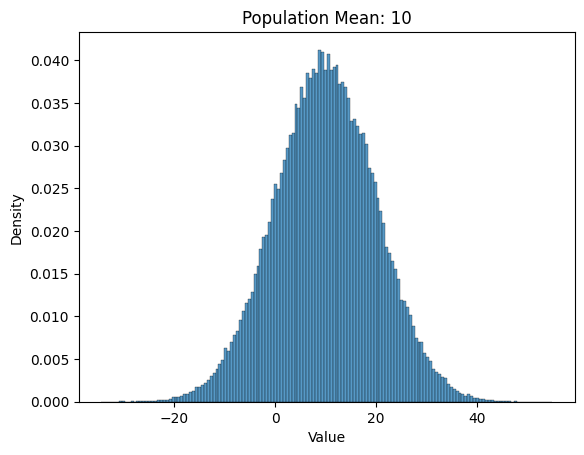

NameError: name 'stats' is not defined

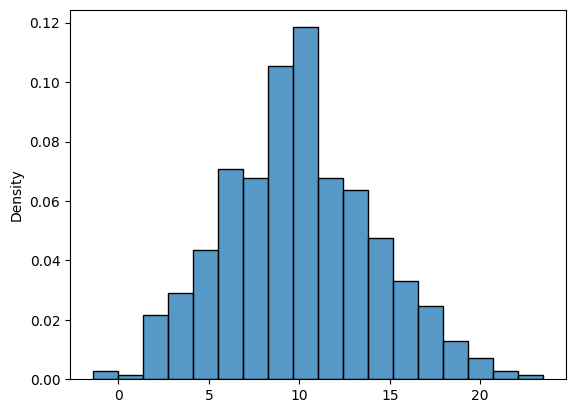

In [6]:
# ---------------------------------------------------
# Define the population parameters
# ---------------------------------------------------
# We assume a population that is normally distributed
# with mean = 10 and standard deviation = 10
population_mean = 10
population_std_dev = 10

# Define the sample size
# Try first with samp_size = 50, then samp_size = 6 to see the effect
samp_size = 6

# ---------------------------------------------------
# Create the population
# ---------------------------------------------------
# Generate 100,000 data points from a normal distribution
# with the specified mean and standard deviation
population = np.random.normal(population_mean, population_std_dev, size=100000)

# ---------------------------------------------------
# Simulate the sampling distribution of the mean
# ---------------------------------------------------
sample_means = []

# Repeat 500 times to approximate the distribution of sample means
for i in range(500):
    # Draw a random sample of size 'samp_size' without replacement
    samp = np.random.choice(population, samp_size, replace=False)
    
    # Calculate the mean of this sample
    this_sample_mean = np.mean(samp)
    
    # Append to the list of sample means
    sample_means.append(this_sample_mean)

# Calculate the average of all sample means for reference
mean_sampling_distribution = round(np.mean(sample_means), 3)

# ---------------------------------------------------
# Plot the original population
# ---------------------------------------------------
sns.histplot(population, stat='density')
plt.title(f"Population Mean: {population_mean}")
plt.xlabel("Value")
plt.show()
plt.clf()

# ---------------------------------------------------
# Plot the sampling distribution of the mean
# ---------------------------------------------------
sns.histplot(sample_means, stat='density')

# According to the CLT:
# - The mean of the sampling distribution ≈ population mean
# - The std. deviation of the sampling distribution = σ / sqrt(n)
mu = np.mean(population)
sigma = np.std(population) / (samp_size ** 0.5)

# Generate x values around ±3 standard errors for plotting the theoretical normal curve
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Overlay the theoretical normal probability density function
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label='Normal PDF')

# Add title showing the simulated sampling distribution mean
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution}")
plt.xlabel("Sample Means")
plt.legend()
plt.show()

## Standard Error
The second part of the Central Limit Theorem introduces the concept of the standard error. While the sampling distribution of the mean is normally distributed, its spread is determined by a standard deviation equal to the population standard deviation divided by the square root of the sample size. This value is called the standard error of the mean. In practice, researchers often do not know the population standard deviation and instead estimate the standard error by using the sample’s standard deviation in the same formula. The standard error captures the expected variability of sample means around the population mean. Two key implications follow: larger samples yield smaller standard errors, meaning the sample mean is a more precise estimate of the population mean, while populations with greater variability produce larger standard errors, reflecting increased uncertainty in sample estimates.

In [ ]:
from scipy import stats
# ----------------------------
# Parameters you can adjust
# ----------------------------
population_mean = 36        # average of the population
population_std_dev = 30     # spread of the population (try 10 vs 30)
samp_size = 50              # number of observations per sample (try 10 vs 50)

# ----------------------------
# Create the population
# ----------------------------
# Simulate a large population of cod weights with Normal(mean, std_dev).
population = np.random.normal(population_mean, population_std_dev, size=100000)

# ----------------------------
# Build the sampling distribution of the mean
# ----------------------------
sample_means = []  # list to store each sample mean

# Repeat 500 times to approximate the sampling distribution
for i in range(500):
    # Draw 'samp_size' observations without replacement
    samp = np.random.choice(population, samp_size, replace=False)
    # Calculate the mean of this sample
    this_sample_mean = np.mean(samp)
    # Save the sample mean
    sample_means.append(this_sample_mean)

# Calculate summary stats for the sampling distribution
mean_sampling_distribution = round(np.mean(sample_means), 3)
std_sampling_distribution  = round(np.std(sample_means), 3)

# Theoretical Standard Error = population std dev / sqrt(sample size)
std_error = population_std_dev / (samp_size ** 0.5)

# ----------------------------
# Plot the population
# ----------------------------
sns.histplot(population, stat='density')
plt.title(f"Population Mean: {population_mean} | Std Dev: {population_std_dev}\n"
          f"Standard Error = {std_error:.3f}")
plt.show()
plt.clf()

# ----------------------------
# Plot the sampling distribution
# ----------------------------
sns.histplot(sample_means, stat='density')

# Calculate the theoretical normal curve based on CLT
mu = np.mean(population)                          # should be close to population_mean
sigma = np.std(population) / (samp_size ** 0.5)   # theoretical std error

# Overlay the normal curve for comparison
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label='Normal PDF')

# Add title showing empirical stats
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} | "
          f"Std: {std_sampling_distribution}")
plt.xlabel("Sample Means")
plt.legend()
plt.show()

## Biased Estimators
According to the Central Limit Theorem, the mean of the sampling distribution of the mean equals the population mean, which makes the sample mean an unbiased estimator. An estimator is considered unbiased when the average of its sampling distribution matches the true value of the corresponding population parameter. While the mean has this property, not all statistics do. The maximum, for example, is a biased estimator because the average of sample maxima falls short of the true population maximum. The same idea applies to other statistics such as the median, variance, or minimum, where the sampling distributions may not be perfectly centered on the population values. This distinction between unbiased and biased estimators is central to evaluating which statistics provide reliable population estimates.

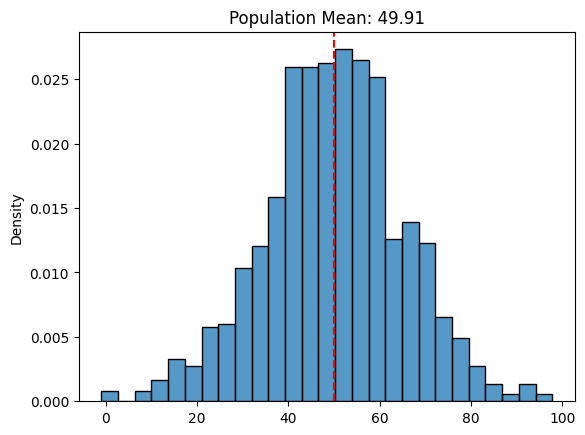

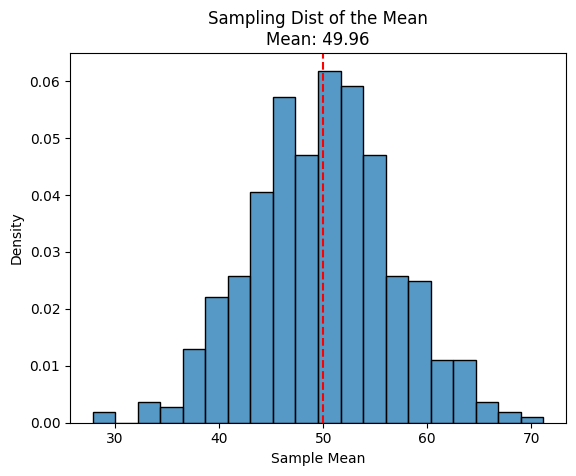

<Figure size 640x480 with 0 Axes>

In [7]:
# ---------------------------------------------------------
# Choose which statistic to calculate on samples and population
# ---------------------------------------------------------
app_stat_text = "Mean"              # change text for plot titles
def app_statistic(x):
    return np.mean(x)               # try np.var(x), np.max(x), etc.

# ---------------------------------------------------------
# Create a synthetic population (Normal with mean=50, std=15)
# ---------------------------------------------------------
mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

# Calculate the statistic for the whole population
pop_statistic = round(app_statistic(population), 2)

# Plot the population distribution and mark the population statistic
sns.histplot(population, stat='density')
plt.axvline(pop_statistic, color='r', linestyle='dashed')   # red line = population statistic
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.show()
plt.clf()

# ---------------------------------------------------------
# Build the sampling distribution for the chosen statistic
# ---------------------------------------------------------
sample_stats = []
samp_size = 5   # sample size per draw

for i in range(500):
    # Draw a random sample
    samp = np.random.choice(population, samp_size, replace=False)
    # Calculate the chosen statistic on this sample
    this_sample_stat = app_statistic(samp)
    # Store result
    sample_stats.append(this_sample_stat)

# Plot the sampling distribution of the statistic
sns.histplot(sample_stats, stat='density')
plt.axvline(np.mean(sample_stats), color='r', linestyle='dashed')   # red line = mean of sampling distribution
plt.title(f"Sampling Dist of the {app_stat_text}\n"
          f"Mean: {round(np.mean(sample_stats),2)}")
plt.xlabel(f"Sample {app_stat_text}")
plt.show()
plt.clf()

## Calculating Probabilities
Using the sampling distribution of the mean, we can compute probabilities about sample averages with the normal CDF. If the population has mean μ and standard deviation σ, then for a sample of size n the sample mean is approximately normal with mean μ and standard error σ/√n. In the salmon example, assume μ = 60 lbs and σ = 40 lbs; for n = 10 fish, the standard error is 40/√10. To find the chance that the average of 10 fish is at most 75 lbs (because a 750 lb crate carries 10 fish), evaluate the normal CDF at x = 75 with mean 60 and standard deviation 40/√10: stats.norm.cdf(75, 60, 40/√10) ≈ 0.882. Interpreted, there’s about an 88.2% probability that a random group of 10 salmon will have an average weight no greater than 75 lbs, so the crate would be sufficient most of the time under these assumptions.

In [8]:
# -------------------------------------------------
# Parameters for cod population and sampling
# -------------------------------------------------
std_dev = 20        # population standard deviation
samp_size = 25      # number of cod in the crate

# Step 1: Calculate the standard error of the mean
# Formula: SE = σ / sqrt(n)
standard_error = std_dev / (samp_size ** 0.5)

# Step 2: Use normal CDF to find probability
# Probability that the sample mean is ≤ 30 lbs
# Population mean = 36
cod_cdf = stats.norm.cdf(30, loc=36, scale=standard_error)

print("Standard Error:", standard_error)
print("Probability sample mean ≤ 30 lbs:", cod_cdf)

NameError: name 'stats' is not defined